# Loading Libraries

In [2]:
import pandas as pd #data preprocessing, csv filr input /output.
import numpy as np #linear algebra

# Loading the Data

In [3]:
titanic_df = pd.read_csv(r'C:\Users\AA\DataScience\datasets\titanic.csv')
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
len(titanic_df)

891

In [5]:
round(len(titanic_df[titanic_df['Survived']==1])/len(titanic_df),2)

0.38

In [6]:
len(titanic_df[(titanic_df['Survived']==1) & (titanic_df['Embarked']=='S')])

217

In [7]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Note: The whole goal is building a model that would predict the survival probability of a person, given their basic features.

# Exploratory Data Analysis (EDA)

In [8]:
print("Number of passenger in the training data who survived: ",len(titanic_df[titanic_df['Survived']==1]))

Number of passenger in the training data who survived:  342


In [9]:
men_survived_perc = 100*np.mean(titanic_df['Survived'][titanic_df['Sex']=='male'])
men_survived_perc

18.890814558058924

In [10]:
women_survived_perc = 100*np.mean(titanic_df['Survived'][titanic_df['Sex']=='female'])
women_survived_perc

74.20382165605095

In [11]:
p_class_survival_1 = 100*np.mean(titanic_df['Survived'][titanic_df['Pclass']==1])
p_class_survival_2 = 100*np.mean(titanic_df['Survived'][titanic_df['Pclass']==2])
p_class_survival_3 = 100*np.mean(titanic_df['Survived'][titanic_df['Pclass']==3])
print("class 1 survived: ",p_class_survival_1)
print("class 2 survived: ",p_class_survival_2)
print("class 3 survived: ",p_class_survival_3)

class 1 survived:  62.96296296296296
class 2 survived:  47.28260869565217
class 3 survived:  24.236252545824847


Survival percentage who survived on 1st, 2nd and 3rd class respectively.

In [12]:
child_per = 100*np.mean(titanic_df['Survived'][titanic_df['Age']<18])
adult_per = 100*np.mean(titanic_df['Survived'][titanic_df['Age']>18])
print("Percentage of children survived: ", child_per)
print("Percentage of Adult survived: ", adult_per)

Percentage of children survived:  53.98230088495575
Percentage of Adult survived:  38.26086956521739


# Data Pre-Processing

We are going to  use a decision tree model which requires only numeric values, but one of our features id categorcal:"female" or "male".
This can be fixed by encoding this feature where "male =1" and "female=0"

In [13]:
titanic_df['Sex'] = titanic_df['Sex'].apply(lambda x : 1 if x == 'male' else 0)

In [14]:
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S

# Missing Values

In [15]:
#check missing values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are lots of values missing from age which is an important feature . So we fill them with mean

In [16]:
titanic_df['Age'] = titanic_df['Age'].fillna(np.mean(titanic_df['Age']))
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S

In [17]:
#Looking at frequency of each values in 'Embarked'
titanic_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
titanic_df[titanic_df['Embarked'].isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

     Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61     0  38.0      0      0  113572  80.0   B28      NaN  
829    0  62.0      0      0  113572  80.0   B28      NaN

Filling missing value of a categorical variable with mode

In [19]:
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

In [20]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Omitting irrelevant columns

In [21]:
titanic_df = titanic_df[['Survived', 'Pclass', 'Sex', 'Age','SibSp', 'Parch','Fare']]

In [22]:
X_feature = titanic_df.drop('Survived', axis=1)
y_target=titanic_df['Survived']

In [23]:
X_feature

Pclass  Sex        Age  SibSp  Parch     Fare
0         3    1  22.000000      1      0   7.2500
1         1    0  38.000000      1      0  71.2833
2         3    0  26.000000      0      0   7.9250
3         1    0  35.000000      1      0  53.1000
4         3    1  35.000000      0      0   8.0500
..      ...  ...        ...    ...    ...      ...
886       2    1  27.000000      0      0  13.0000
887       1    0  19.000000      0      0  30.0000
888       3    0  29.699118      1      2  23.4500
889       1    1  26.000000      0      0  30.0000
890       3    1  32.000000      0      0   7.7500

[891 rows x 6 columns]

In [24]:
y_target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Train and Test Split

We have our training data, and we have our test data. but in order to evaluate our model we need to split the training dataset into a train dataset and a test dataset. The test data would be used to evaluate the model, while the training data would be used to train the data.

In [25]:
from sklearn.model_selection import train_test_split
X_feature_train, X_feature_test, y_target_train, y_target_test = train_test_split(
X_feature,y_target,test_size=0.33, random_state=42
)

# Building ML Model

Now we are finally ready we can train the model.
First Import Model 
Then feed the model both the data (X_feature_train) and the for that data (y_target_train)

In [26]:
from sklearn.tree import DecisionTreeClassifier
dec_model = DecisionTreeClassifier()
dec_model.fit(X_feature_train, y_target_train)

DecisionTreeClassifier()

# Evalute the model

In [27]:
y_pred_test = dec_model.predict(X_feature_test)
y_pred_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0], dtype=int64)

In [28]:
y_pred_train = dec_model.predict(X_feature_train)
y_pred_train

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [29]:
from sklearn.metrics import accuracy_score
traininng_accuracy = accuracy_score(y_target_train, y_pred_train)
print("Training Accuracy: ",traininng_accuracy)

Training Accuracy:  0.9798657718120806


In [30]:
test_accuracy = accuracy_score(y_target_test,y_pred_test)
print("Test Accuracy: ",test_accuracy)

Test Accuracy:  0.7559322033898305


In [31]:
from sklearn.tree import export_graphviz
import graphviz

In [32]:
dot_data = export_graphviz(dec_model,out_file=None,feature_names=X_feature_test.columns,
                          class_names=['0','1'],filled=True, rounded=True,special_characters=True)

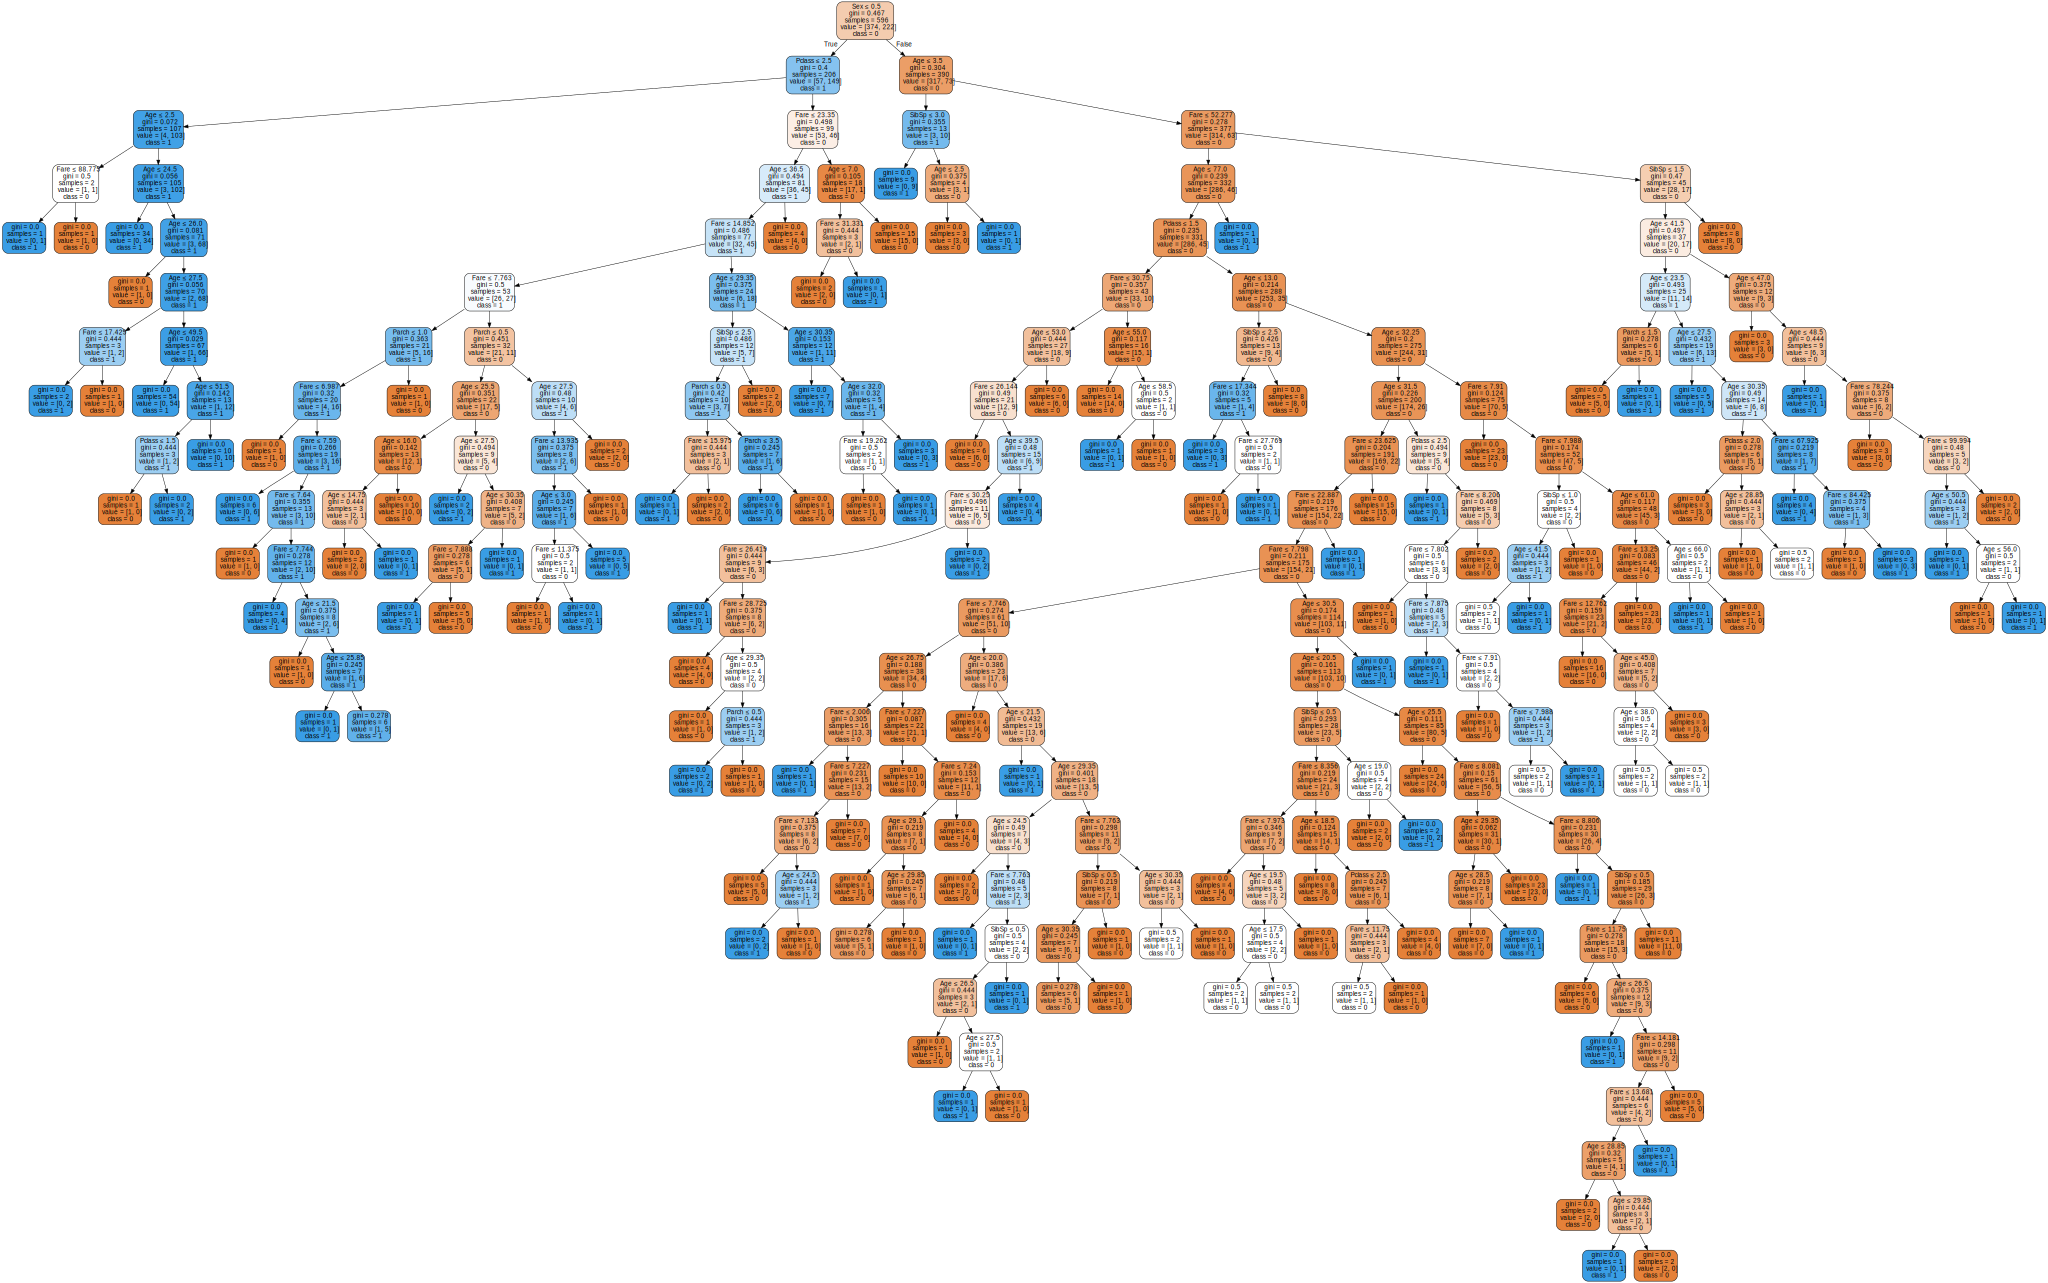

In [33]:
graph1 = graphviz.Source(dot_data)
graph1

# Improve the Model

In [34]:
model_improved = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=None)
model_improved.fit(X_feature_train,y_target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [35]:
y_im_pred_train = model_improved.predict(X_feature_train)
y_im_pred_train

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [36]:
y_im_pred_test = model_improved.predict(X_feature_test)
y_im_pred_test

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [37]:
improved_train_score = accuracy_score(y_target_train,y_im_pred_train)
improved_train_score

0.8238255033557047

In [38]:
improved_test_score = accuracy_score(y_target_test,y_im_pred_test)
improved_test_score

0.8203389830508474

In [39]:
model_improved.predict([[3,1, 28,0,1,75]])

C:\Users\AA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [40]:
from sklearn.model_selection import cross_val_score
for depth in range(2,8):
    print('WITH DEPTH: ',depth)
    cv_score = cross_val_score(DecisionTreeClassifier(max_depth=depth,max_features=None), 
                                          X_feature_train, y_target_train, cv=10, scoring='accuracy')
    print('Average train score: ',cv_score.mean())
    print('Std train score: ', cv_score.std())

WITH DEPTH:  2
Average train score:  0.8036158192090396
Std train score:  0.0533085801506073
WITH DEPTH:  3
Average train score:  0.8171751412429378
Std train score:  0.07624102772646354
WITH DEPTH:  4
Average train score:  0.7886723163841809
Std train score:  0.05821107281859106
WITH DEPTH:  5
Average train score:  0.7986440677966102
Std train score:  0.05451506083078816
WITH DEPTH:  6
Average train score:  0.8104237288135593
Std train score:  0.054930458998050796
WITH DEPTH:  7
Average train score:  0.8154237288135592
Std train score:  0.038210681464507554


We can see that while the train score went down, the test score has improved and it is now almost as high as the train score.

In [41]:
dot_data =export_graphviz(model_improved,out_file=None,impurity=False,
                         feature_names=X_feature_test.columns, class_names=['0','1'],
                         filled=True,rounded=True)

In [42]:
graph2 = graphviz.Source(dot_data)

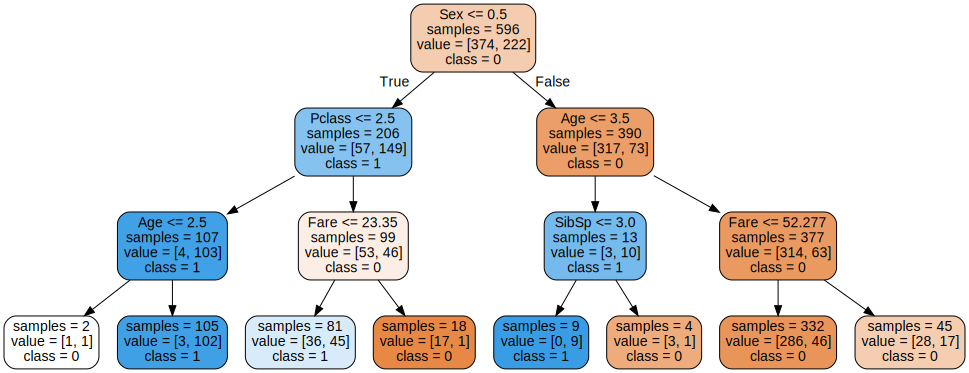

In [43]:
graph2

# Optimization

In [48]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':[i for i in range(2,6)],
             'criterion':['gini','entropy'],
              'max_features':['auto','sqrt','log2',None]
             }
clasf = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=10,verbose=2,scoring='accuracy')
clasf.fit(X_feature_train,y_target_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=2, max

[CV] END .....criterion=gini, max_depth=4, max_features=None; total time=   0.0s
[CV] END .....criterion=gini, max_depth=4, max_features=None; total time=   0.0s
[CV] END .....criterion=gini, max_depth=4, max_features=None; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini, max_depth=5, max_features=auto; total time=   0.0s
[CV] END .....criterion=gini

[CV] END ..criterion=entropy, max_depth=4, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=auto; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=4, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy

C:\Users\AA\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AA\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AA\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\AA\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\AA\anaconda3\Lib\site-packages\sklearn\utils\

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2', None]},
             scoring='accuracy', verbose=2)

In [46]:
clasf.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'max_features': None}

best hyperparameters are :{'criterion': 'entropy', 'max_depth': 3, 'max_features': None}

In [47]:
print("Best Score: ", clasf.best_score_)

Best Score:  0.8188418079096044


# GridSearchCV with Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
param_grid  = {'n_estimators':[i for i in range(10,110,10)],
               'max_depth':[i for i in range(2,6)],
               'criterion':['gini','entropy'],
               'max_features':['auto','sqrt','log2',None]}
clasf = GridSearchCV(RandomForestClassifier(),param_grid,cv=10,verbose=2,scoring='accuracy')
clasf.fit(X_feature_train,y_target_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits
[CV] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=auto, n_estimators=10; total time=   0.0s
[CV] 

[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=20; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=

[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=2, max_features=log2, n_est

[CV] END criterion=gini, max_depth=2, max_features=log2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=log2, n_estimators

[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=2, max_features=None, n_estimators=

[CV] END criterion=gini, max_depth=3, max_features=auto, n_estimators=90; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, n_estimators=90; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, n_estimators=90; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, n_estimators=90; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, n_estimators=90; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, n_estimators=90; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, n_estimators=90; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, n_estimators=90; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, n_estimators=90; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, n_estimators

[CV] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=sqrt, n_estimators=

[CV] END criterion=gini, max_depth=3, max_features=log2, n_estimators=60; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, n_estimators=60; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, n_estimators=70; total time=   0.0s
[CV] END criterion=gini, max_depth=3, max_features=log2, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=log2, n_estimators=

[CV] END criterion=gini, max_depth=3, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=gini, max_depth=3, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=None, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=None, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=None, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=None, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=None, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=None, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=3, max_features=None, n_estimators=

[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=90; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=90; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=90; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=90; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=90; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=90; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=90; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=90; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=90; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, n_estimators

[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=70; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, n_estimators=

[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=log2, n_estimators=

[CV] END criterion=gini, max_depth=4, max_features=None, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=None, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=None, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=None, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=None, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=None, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=None, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=None, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=None, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=None, n_estimators=60; total time=   0.1s
[CV] END criterion=gini, max_depth=4, max_features=None, n_estimators=

[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=

[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=log2, n_e

[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=log2, n_estimators=

[CV] END criterion=gini, max_depth=5, max_features=None, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=None, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=None, n_estimators=70; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=None, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=None, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=None, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=None, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=None, n_estimators=80; total time=   0.1s
[CV] END criterion=gini, max_depth=5, max_features=None, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=None, n_estimators=80; total time=   0.2s
[CV] END criterion=gini, max_depth=5, max_features=None, n_estimators=

[CV] END criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=2,

[CV] END criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=2, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_de

[CV] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=log2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=2,

[CV] END criterion=entropy, max_depth=2, max_features=None, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=None, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=None, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=None, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=None, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=None, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=None, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=None, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, max_features=None, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=2, max_features=None, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=2,

[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=3,

[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV] END criterion=entropy, max_de

[CV] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=80; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=3, max_features=log2, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=3,

[CV] END criterion=entropy, max_depth=3, max_features=None, n_estimators=60; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=None, n_estimators=60; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, max_features=None, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=None, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=None, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=None, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=None, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=None, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=None, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=3, max_features=None, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=3,

[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=auto, n_estimators=100; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=entropy, max

[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=90; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=90; total time=   0.2s
[CV] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=90; total time=   0.3s
[CV] END criterion=entropy, max_depth=4,

[CV] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=80; total time=   0.1s
[CV] END criterion=entropy, max_depth=4,

[CV] END criterion=entropy, max_depth=4, max_features=None, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=None, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=None, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=None, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=None, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=None, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=None, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=None, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=None, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=4, max_features=None, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=4,

[CV] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=80; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=90; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=auto, n_estimators=90; total time=   0.0s
[CV] END criterion=entropy, max_depth=5,

[CV] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=60; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=70; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=sqrt, n_estimators=70; total time=   0.1s
[CV] END criterion=entropy, max_depth=5,

[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=60; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=60; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=60; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=60; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=60; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=60; total time=   0.0s
[CV] END criterion=entropy, max_depth=5,

[CV] END criterion=entropy, max_depth=5, max_features=None, n_estimators=40; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=None, n_estimators=40; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=None, n_estimators=40; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=None, n_estimators=40; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=None, n_estimators=40; total time=   0.5s
[CV] END criterion=entropy, max_depth=5, max_features=None, n_estimators=40; total time=   0.2s
[CV] END criterion=entropy, max_depth=5, max_features=None, n_estimators=40; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=None, n_estimators=40; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, max_features=None, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_depth=5,

C:\Users\AA\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
800 fits failed out of a total of 3200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AA\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AA\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\AA\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\AA\anaconda3\Lib\site-packages\sklearn\uti

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             scoring='accuracy', verbose=2)

In [50]:
print('Best Hyperparameters: ', clasf.best_params_)

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'n_estimators': 100}


In [51]:
print('Best Score: ', clasf.best_score_)

Best Score:  0.8354802259887005
